## Activation functions

Neuronal network uses activation functions for the following reasons:

 1. To realize a **non-linear mapping** between the input and output data. Without activation functions a neuronal network would be a linear function and could not learn anything interesting. Think about fitting any dataset with just a straight line.
 
 2. The last activation **transforms the output** so that it is useful for prediction and loss calculation. For example classification problems transform the output to a probability distribution. 

Overview of popular activation functions:

<img src="images/activation-functions.png" height="400" width="500"/>

Recall that our MNIST classifier example had the following form:

$$
z = relu(W_1 \cdot x + b_1) \\
y = softmax(W_2 \cdot z + b_2)
$$

This model is using the `relu` and `softmax` activation functions.


### Rectified Linear Unit  (ReLU)

The Rectified Linear Unit is the most commonly used activation function. 

$$ f(x)=max(0, x) $$

The function returns 0 if it receives any negative input and otherwise just returns the input.

ReLU does not require any normalization or exponential computation and is **fast to calculate**, this reduces training time.

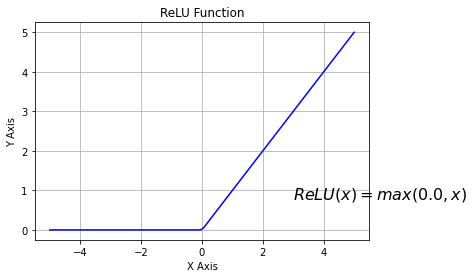

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def ReLU(x):
    return np.maximum(0.0, x)

X = np.linspace(-5, 5, 100)
plt.plot(X, ReLU(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('ReLU Function')
plt.grid()
plt.text(3, 0.8, r'$ReLU(x)=max(0.0, x)$', fontsize=16)
plt.show()

One problem with ReLU are elements $x_i$ of the input vector $x$ that are always negative. For these elements the ReLU value is always negative. This is called **dying ReLU problem** and should be monitored during training.

A solution for that problem are ReLU modifications like `Leaky ReLU` and `Exponential Linear Units (ELUs)`.

### Sigmoid function

The [Sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) squashes real numbers to the interval [0,1].

$$
\sigma(x) = \frac{1}{1+e^{-x}}
$$

It is usually used as the final activation function for **binary classification problems**.

It takes the unnormalized output of the previous layer and calculates $ P(y=1∣x) $, this is the probability that example $x$ belongs to class 1.

It follows that: $ P(y=1∣x) = 1 - P(y=0∣x) $


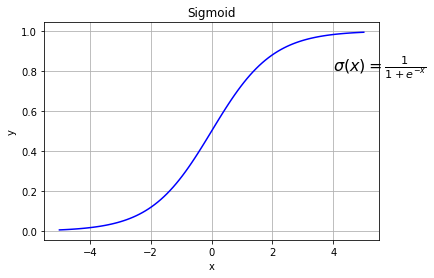

In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def sigma(x):
    return 1 / (1 + np.exp(-x))

X = np.linspace(-5, 5, 100)
plt.plot(X, sigma(X),'b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sigmoid')
plt.grid()
plt.text(4, 0.8, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)
plt.show()

The Sigmoid and tanh activation function suffer from a **vanishing gradient problem**. Both end of these curves are almost horizontal. Gradient values in these parts of the curve are very small and gradient based optimization methods do not work very well.

Example application of the sigmoid function:

In [3]:
import numpy as np

def sigma(x):
    return 1 / (1 + np.exp(-x))

# Lets assume the model has two classes: '0' and '1'

# `z` is the output of the layer previous to the Sigmoid function
z = 1.8

print('P(y=1|x) = %f' % sigma(z))
print('P(y=0|x) = %f' % (1.0-sigma(z)))

P(y=1|x) = 0.858149
P(y=0|x) = 0.141851


## Softmax activation

For a vector $x = [x_0,...,x_n]$ the softmax function calculates:

$ softmax(x_i) = \frac{e^{x_i}}{\sum_i {e^{x_i}}} $

**Note:** In Keras any [activation function](https://keras.io/activations/) can either be used with an Activation layer, or through the activation argument in the layer constructor.

In [12]:
import numpy as np

def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

# Lets assume assume the model has 4 classes

# `z` is the output of the layer previous to the Softmax function
z = [8.0, 2.0, 9.0, 3.0]

probs = softmax(z)
print(f'Previous layer output: {z}\n')

print('Model output:')
for i in range(probs.shape[0]):
    print('P(y=%d|x) = %f' % (i, probs[i]))

print('\nPredicted class:', np.argmax(probs))


Previous layer output: [8.0, 2.0, 9.0, 3.0]

Model output:
P(y=0|x) = 0.268276
P(y=1|x) = 0.000665
P(y=2|x) = 0.729251
P(y=3|x) = 0.001808

Predicted class: 2


In [13]:
import numpy as np
from tensorflow.keras.layers import Input, Activation
from tensorflow.keras.models import Model

nb_classes = 4
inputs = Input(shape=(nb_classes,), dtype='float32')
softmax = Activation('softmax')(inputs)
model = Model(inputs=inputs, outputs=softmax)
model.compile(optimizer='sgd', loss='mse')

# simulate the output of the last layer
z = np.array([[8.0, 2.0, 9.0, 3.0]])
probs = model.predict(z)

for i, prob in enumerate(probs[0]):
    print('Probability for label %d: %f' % (i, prob))
print('Predicted label:', np.argmax(probs))

Probability for label 0: 0.268276
Probability for label 1: 0.000665
Probability for label 2: 0.729251
Probability for label 3: 0.001808
Predicted label: 2


You only have to calculate the softmax output if you are interested in the probabilities. If you are only interested in the predicted label just determine the index of the largest output value.